![](https://pbs.twimg.com/media/FrM6zRyWABUwUcj?format=jpg&name=4096x4096)

$\begin{array}{|c|c|} \hline
\textbf{Versão} & \textbf{Data} & \textbf{Responsável} & \textbf{Descrição} \\ \hline
\textit{1.0}             & \textit{21/mar/23}     & \textit{Luiz Barboza}         & \textit{Versāo inicial} \\ \hline
\end{array}$

# Series Temporais - Aula 2

Vamos iniciar importando os dados como dataframe, pd.read_csv(‘casos-brasil.csv’), vamos dar um head para ver como está nosso dataframe. Temos a semana epidemiológica, a data, o país, obviamente o Brasil, Estado, cidade, e outras informações, tipo novos óbitos, novos casos, etc. No começo tínhamos casos em São Paulo, apenas, mas se eu colocar um tail aqui, vamos ver que nos últimos dados que temos desse banco de dados, temos Santa Catarina, Sergipe, e no final o total. É muita série temporal. Então o que vou fazer? Vou filtrar para pegarmos só os dados de São Paulo. 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/postech_ts/main/cases-brazil-states.csv')
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')
df.index = df['data']
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


E tudo que fizermos aqui podemos fazer para outros Estados, é equivalente. Vou chamar de df_sp, que vai ser basicamente o df, mas tenho que selecionar a variável que quero filtrar, que vai ser Estado, e vai ser igual a sp. Vou usar a função **seasonal_decompose**, vou usar na seguinte variável, novos óbitos, e ele tem outro parâmetro que é a frequência. Se vocês voltarem no primeiro curso para quem não lembra, os novos óbitos eram computados semanalmente, nós tínhamos essa sazonalidade semanal. E é exatamente isso que vamos fazer aqui. Vou colocar uma frequência de sete dias, porque já temos essa informação. Vamos rodar, e no próximo vídeo já vamos começar a plotar de fato essas informações e ver como elas aparecem para nós.

In [ ]:
import matplotlib.pyplot as plt
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

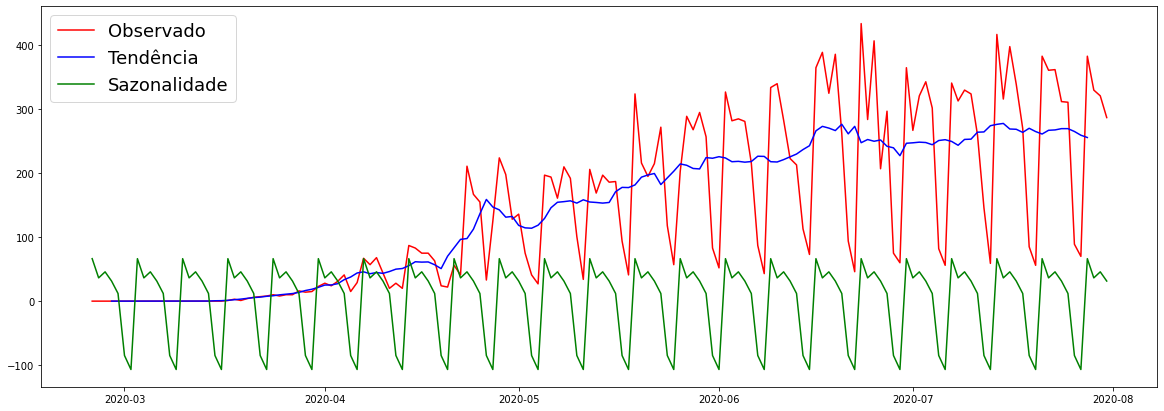

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
resultados = seasonal_decompose(df_sp.novosObitos)
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green','Observado','Tendência','Sazonalidade')

Vamos fazer um comparativo, por exemplo, entre Minas Gerais, Rio de Janeiro e São Paulo. Vou voltar onde fiz o filtro de São Paulo, vou copiar essa linha de código, vou colar e fazer algumas modificações. Vou criar mg e rj. Também vou precisar transformar o índice, para ficar com gráficos bonitos. Aqui estou comparando as tendências dos três Estados. Tenho claramente um achatamento da curva no Rio de Janeiro, teve um aumento, depois começou a decair. Tenho um aumento bem mais expressivo no Estado de São Paulo, e em Minas Gerais também tenho uma tendência de crescimento, porém ela tem uma taxa bem menor do que a taxa de São Paulo, por exemplo. Acaba que no fim de semana trabalha sob plantão, temos um número menor de novos óbitos, novos casos, entre outros. Mas isso é um claro comparativo que podemos analisar diferentes séries temporais utilizando os mesmos padrões de análise. Então, padrão de tendência, padrão de sazonalidade, etc.

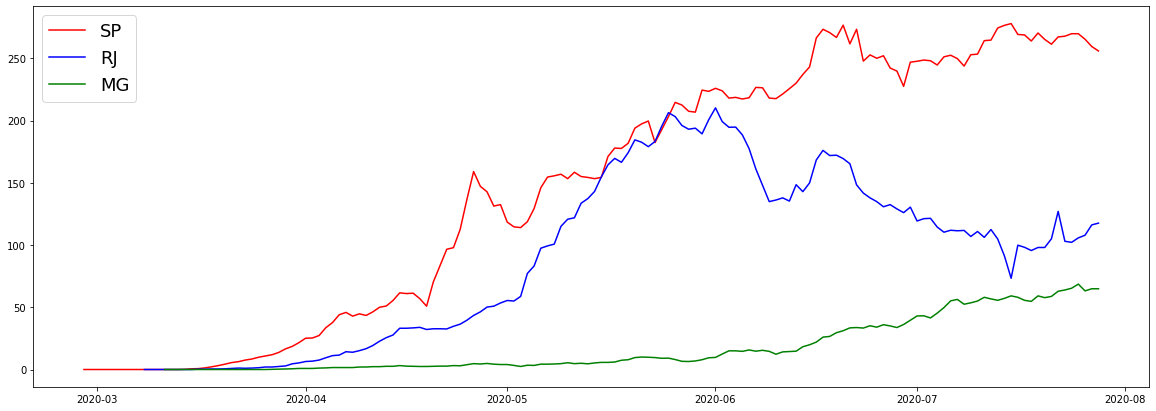

In [ ]:
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
resultados_rj = seasonal_decompose(df_rj.novosObitos)
resultados_mg = seasonal_decompose(df_mg.novosObitos)
plotar(resultados.trend, resultados_rj.trend,resultados_mg.trend, 'red','blue','green','SP','RJ','MG')
plotar(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green','SP','RJ','MG')

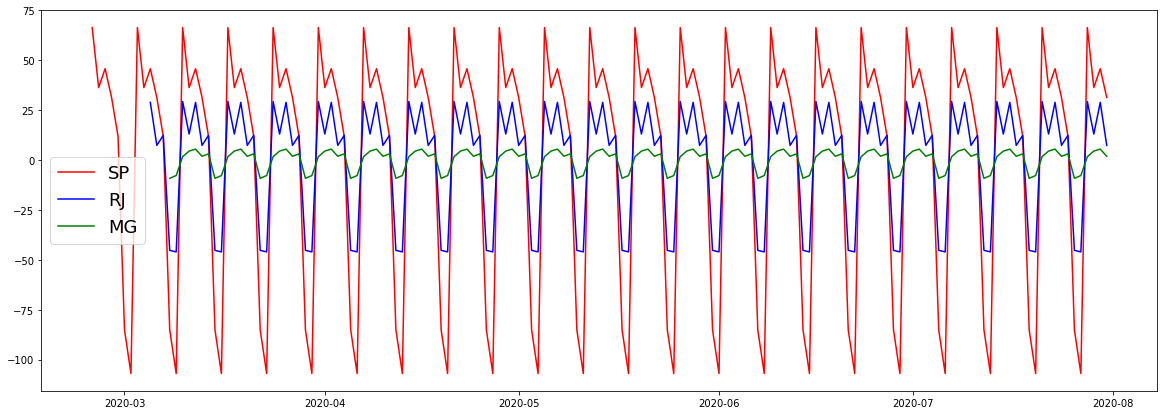

In [ ]:
plotar(resultados.seasonal, resultados_rj.seasonal,resultados_mg.seasonal, 'red','blue','green','SP','RJ','MG')

 Nessa aula vamos falar um pouco sobre estacionariedade. Como definir e como saber se uma série temporal é estacionaria ou não. A primeira análise que precisamos fazer em relação a estacionariedade é em relação aos padrões que podemos encontrar, porque se um desses padrões estiver presente, é bem possível que nossa série não seja estacionária.  O primeiro deles é a tendência. A tendência é definida basicamente como um crescimento ou um decrescimento ao longo de um período de tempo. Então se eu calcular, por exemplo, a média ao longo do tempo, a variância ao longo do tempo e ela estiver aumentando ou diminuindo, é bem possível que eu tenha uma tendência. Aqui temos um exemplo. Tenho o número de passageiros de determinada companhia aérea ao longo do tempo. O que nós percebemos é que se eu olhar do início até o fim da minha série temporal eu tenho um aumento. Esse aumento tem que ser presente ao longo de toda a série temporal. Não basta eu simplesmente olhar, por exemplo, esses dois pontos, e falar que tenho uma tendência de crescimento aqui. Ele é uma característica de toda a nossa série temporal. Normalmente inclusive acaba durando muito mais do que um ano.

 ![](https://pbs.twimg.com/media/Frx5BvqWAAIRqyc?format=jpg&name=medium)


 
Outro padrão muito comum é a sazonalidade. A sazonalidade inclusive temos até um sentimento em relação ao que ela significa, porque ela é uma variação numa frequência fixa. Nesse mesmo caso, temos passageiros de uma determinada companhia aérea e além daquela tendência de crescimento temos esse comportamento repetitivo, que pode ser por causa de férias. Férias escolares, verão. Se pensássemos, por exemplo, em vendas de sorvete. Normalmente é de se esperar que durante o verão temos um aumento nas vendas de sorvete e no inverno tenhamos uma diminuição. Essa sazonalidade pode acontecer por diversos motivos.  No caso da covid, chegamos a ver no primeiro curso que tínhamos uma sazonalidade por conta dos plantões. Como nos finais de semana não tínhamos o trabalho de plantão, na verdade, eles trabalhavam sob plantão, tinha certo atraso na divulgação dos dados.

![](https://pbs.twimg.com/media/Frx5MfCWIAEogbN?format=jpg&name=medium)


E como definimos uma série estacionária? A definição prática é quando a média e a variância são constantes ao longo do tempo, ou seja, quando não tem nenhuma tendência, quando não tem nenhuma sazonalidade, podemos dizer que nossa série temporal é estacionária. Aqui temos um exemplo, a diferença no valor de um fechamento de uma ação específica. Por ser uma diferença, não estamos computando o preço da ação especificamente naquele dia, estamos computando a diferença, acaba que a média ou a variância ao longo do tempo é aproximadamente constante, por isso temos uma série estacionária.

![](https://pbs.twimg.com/media/Frx5aO9WYAMTiv-?format=jpg&name=medium)

Como transformamos uma série em uma série estacionária? Computando a diferenciação. Exatamente por isso que esse exemplo anterior, como era a diferença entre dias, por definição já é uma série temporal estacionária.  Em relação a definições mesmo, quando calculamos a diferença entre os lags, ou seja, entre os valores observados, normalmente conseguimos transformar uma série que era não estacionária em uma série estacionária. Então, se observarmos, esse é o valor das ações ao longo dos dias e quando calculamos a diferença no valor do fechamento, transformamos nossa série, que antes era não estacionária em uma série estacionária.

![](https://pbs.twimg.com/media/Frx5obIWwAEjBVP?format=jpg&name=medium)



É de característica das séries temporais que elas sejam altamente correlacionadas, porque é a mesma variável, mas ao longo do tempo. Inclusive vamos poder prever o resultado de uma série temporal exatamente por essa característica. Pelo fato de acreditarmos que o passado e o presente dessa série temporal são importantes nós conseguimos prever o futuro, digamos assim. Aqui temos um exemplo. Tenho a produção de eletricidade ao longo do ano. O que podemos analisar em relação a esse gráfico? A função autocorrelação vai medir exatamente essa análise entre cada um dos meus lags. Se eu voltar, tenho de 1980 até 1995, podemos ver que tem um pouco de tendência e tem sazonalidade. Tenho valores um pouco repetidos. Quando ploto minha função autocorrelação estou calculando a autocorrelação entre cada um dos meus lags. O que é interessante é que os padrões, por exemplo, de sazonalidade e tal, vão estar presentes nesse gráfico, que é o que chamamos de gráfico ACF.

![](https://pbs.twimg.com/media/Frx7UgVXwAAFDN8?format=jpg&name=medium)


Preciso também transformar minha série temporal em uma série estacionária. Outra coisa que posso calcular é a autocorrelação parcial. Ela é um pouco diferente da autocorrelação. Normalmente, essa autocorrelação parcial entre duas variáveis, quando não estou trabalhando com uma série temporal, ela vai ser a quantidade de correlação entre elas que não vai ser explicada pelas suas correlações mútuas.

![](https://pbs.twimg.com/media/Frx7ayqXwAIkf4R?format=jpg&name=small)

Como sabemos se uma série é estacionária ou não? Existem alguns testes. Um deles é o mais famoso, o ADF, que também pode significar o augmented dickey-fuller, ele é um cálculo estatístico e basicamente vai determinar o quão uma série temporal pode ser definida pela sua tendência. o **adfuller** é um teste de hipótese, um teste AB.  Vamos ter duas hipóteses, a hipótese nula, ou seja, a série é não estacionária e é dependente do tempo, e temos a hipótese alternativa, ou seja, a série é estacionária, então ela não depende do tempo, a média e a variância são constantes ao longo do tempo. Se calcular o valor p ou p valor e ele for abaixo de um valor limite, que normalmente é 0.05, nós rejeitamos a hipótese nula e definimos que nossa série temporal é estacionária. Se calcularmos o p valor e ele der muito mais alto do que 0.05, provavelmente nossa série temporal é não estacionária, e é isso que vamos ver nos próximos vídeos.

In [ ]:
from statsmodels.tsa.stattools import adfuller
y = df_sp['Casos']
adfuller(y.dropna())

(1.3664743612803425,
 0.9969563888815705,
 14,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 2627.7242380318335)

Ele está me dizendo que meu p valor é 0.99, ou seja, é muito acima do que o 0.05, em relação a esse nosso teste AB. Isso significa o quê? Que minha série temporal não é estacionária. E assim, já tínhamos algumas dicas disso, porque se voltarmos no nosso gráfico, tenho tendência, sazonalidade. É óbvio, isso é sobre novos óbitos, mas vamos substituir aqui e colocar casos. Vou rodar de novo só para vermos como ficaria. Tenho um aumento significativo, independente da sazonalidade, que existe, que estamos vendo em verde, tenho uma tendência, então se eu for calcular, por exemplo, a média ou a variância ao longo do tempo, ela obviamente não vai ser constante, porque está crescendo. Já tinha essa dica de que não seria uma série temporal estacionária. O que podemos fazer agora? Plotar a ACF, então a autocorrelação, e a autocorrelação parcial, para darmos uma olhada como elas ficam antes da diferenciação e depois da diferenciação.
 

Eu tenho minha função autocorrelação, o que podemos ver? Que nos dados originais os dados são altamente correlacionados, o que era de se esperar. Se olharmos em cima como são os dados, é uma curva, provavelmente exponencial, então o valor que está aqui é altamente correlacionado com o valor que estava um, dois dias atrás. Até vinte dias atrás.



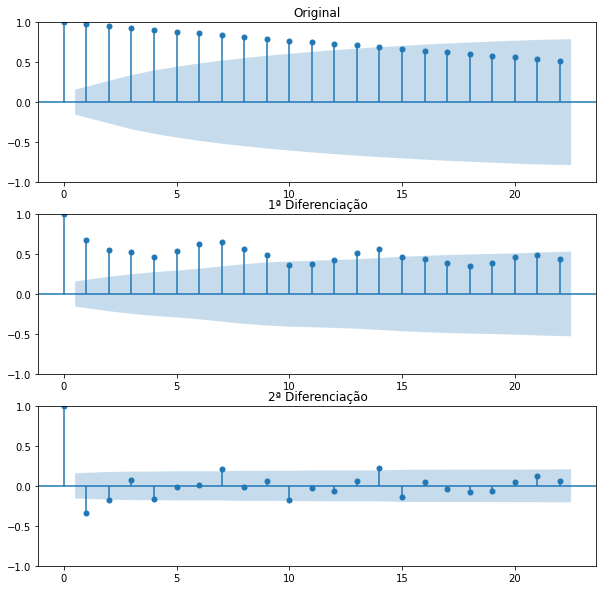

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())

Quando aplico a primeira diferenciação, tenho uma diminuição disso. Mas ainda consigo ver esse comportamento oscilatório, que está relacionado à sazonalidade, porque aí a sazonalidade começa a importar um pouco mais, já que você já diminuiu essa magnitude dos seus dados. A segunda diferenciação já não tenho mais esse comportamento repetitivo, mas qual o problema? Se olharmos aqui, tenho agora até uma autocorrelação negativa, de menos 0.25. Isso pode significar que nós diferenciamos demais nossos dados, e é isso que vamos ver no próximo vídeo, como cuidar desse tipo de abordagem.

 O que nós percebemos é que realmente, eu não vejo muita diferença da primeira para a segunda diferenciação. Então de fato talvez quando apliquei a segunda diferenciação, inclusive gerei essa autocorrelação negativa, eu estivesse fazendo o que chamamos de sobrediferenciação. É quando acabamos diferenciando mais do que deveríamos.

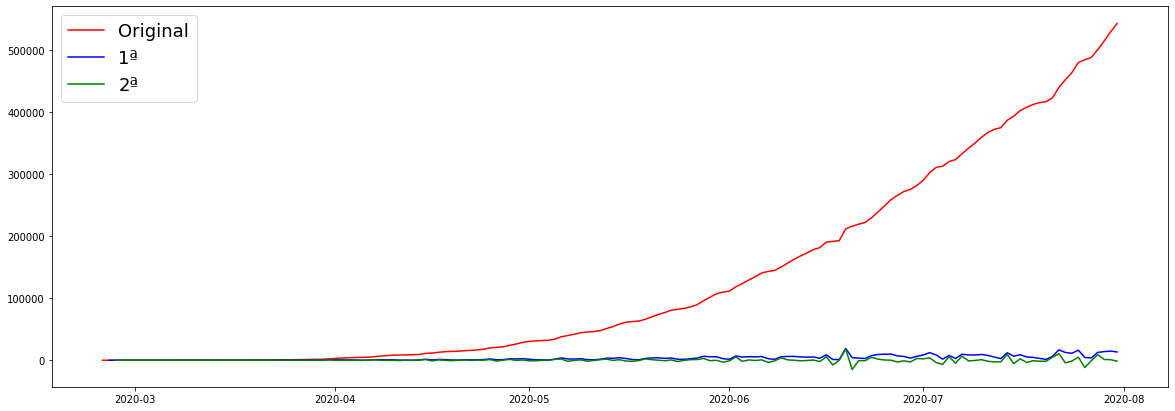

In [ ]:
plotar(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1ª','2ª')

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


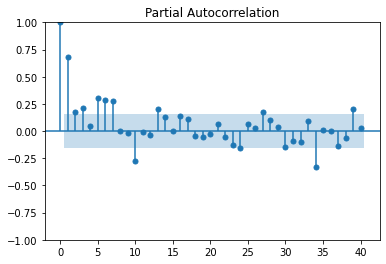

In [ ]:
plot_pacf(y.diff().dropna(),lags=40);

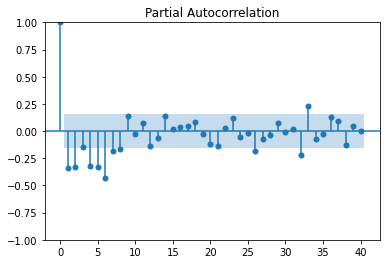

In [ ]:
plot_pacf(y.diff().diff().dropna(),lags=40);

Qual a questão? Existem diversos algoritmos para que consigamos prever uma série temporal. Ainda não falamos sobre eles, mas existe uma série. Tem o autorregressivo, tem a média móvel, MA, o AR e tal. De forma geral vamos usar um que é uma combinação desses parâmetros, que é o ARIMA. O ARIMA é exatamente um acrônico para essa junção do AR, que é o auto regressive, o MA, que é o moving average, e temos o i, que é exatamente o grau de diferenciação. Definir se vou diferenciar uma ou duas vezes vai impactar nos parâmetros que vou determinar para o meu modelo. O que vamos fazer aqui também é dar uma analisada na autocorrelação parcial. Se eu plotar, por exemplo, a minha autocorrelação parcial da primeira diferenciação, e vou dropar o NA e vou mandar ele plotar em quarenta lags, ou seja, quarenta dias. Essa é minha autocorrelação parcial. Agora, posso até colocar dois pontos para aparecer só um resultado, vamos fazer a mesma coisa para a segunda diferenciação. Vou colocar diff().diff() e ver o que tenho aqui. Eu de fato gerei uma autocorrelação negativa super grande. Eu estou manipulando demais os meus dados. Isso tudo nos leva a crer, inclusive ela está até ultrapassando a região azul que é o limite de significância. Significa que de fato estou manipulando demais nossos dados. O que posso dizer para vocês? Menos é mais. É melhor que você diferencie um pouco menos e de fato sobre algumas informações, então o que temos de informação é que tenho uma autocorrelação negativa no décimo dia, no trigésimo quarto dia, que ainda tenho uma autocorrelação positiva no segundo dia, o que é de se esperar, o que aconteceu ontem de fato tem que importar um pouco, mas quando de fato adiciono essa segunda diferenciação, estou manipulando demais meu modelo, e isso pode gerar problemas no futuro. Por isso primeiramente vamos continuar com uma diferenciação apenas. E vamos fazer isso no nosso modelo ARIMA. Perceba que determinar esses parâmetros não são uma coisa fácil. Vamos começar a brincar agora com os parâmetros desse modelo ARIMA e vamos ver que talvez precisemos de um pouco mais de teoria e algumas outras técnicas para de fato fazer as coisas funcionarem.

O ARIMA tem diversos parâmetros que vamos precisar ajustar. Temos o p, que é relacionado à parte do modelo autorregressivo, temos o q, que é relacionado à parte do moving average e temos o d, que é a parte da diferenciação. E como definir esses parâmetros? Supostamente só precisamos olhar para curva de autocorrelação parcial e para curva de autocorrelação. Mas, na prática, não é exatamente isso que acontece. O que vou fazer? Vou plotar aqui, e já chegamos à conclusão de que vamos usar só uma diferenciação.

Vou plotar de novo só em 20 lags a autocorrelação parcial. O que estamos vendo? Vamos contar quantos dos nossos lags ainda estão acima dos valores esperados, digamos assim. Temos o segundo lag, que está super acima do valor esperado, e por esse motivo esse é o que vai determinar o parâmetro q, a parte MA, porque o modelo MA na realidade faz uma regressão linear com os erros da previsão, ou seja, os resíduos, e precisamos considerar quantos lags de fato estão adicionando essa informação.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


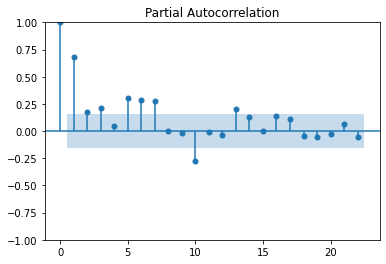

In [ ]:
plot_pacf(y.diff().dropna());

Nesse caso, eu posso ser conservador e considerar um só, um lag que está acima da minha significância, isso significa então que no modelo ARIMA, se adicionarmos um markdown, que vai ser determinado por p, d e q, já temos o d, que a ordem da diferenciação vai ser igual a 1, e o q, que a ordem da parte MA, ou seja, que vai cuidar dos resíduos, vou dizer também que ele vai ser 1. E posso fazer a mesma coisa plotando a ACF, ou seja, minha curva de autocorrelação. O que vemos aqui é que tenho vários lags que estão acima da parte de significância estatística. Qual o problema aqui? Na realidade, o modelo ARIMA não é tão bom assim quando você tem sazonalidade, que é nosso caso.


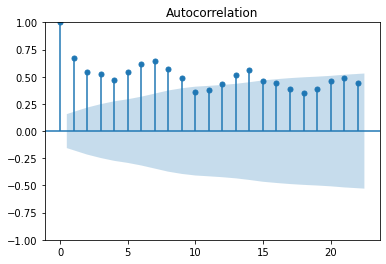

In [ ]:
plot_acf(y.diff().dropna());


Mesmo com essa diferenciação temos bastante sazonalidade. E aí a questão é para que controlássemos essa sazonalidade teríamos que usar o modelo ARIMA sazonal, que é o que vamos fazer nas próximas aulas. Teria duas formas de resolver isso. Primeiro, simplesmente considerar que p é igual a 1, para manter o modelo mais simples possível, já que adicionar mais complexidade não vai melhorar o modelo, dado que isso é um problema da sazonalidade, ou o que poderíamos fazer é na realidade considerar a segunda diferenciação e teríamos que lidar com esse problema de sobrediferenciação.

Tem duas opções. Considerar tudo igual a 1 e aí não vamos ter um resultado tão bom, em especial porque temos sazonalidade, ou considerar logo a diferenciação como 2, por exemplo, assumir que vamos ter uma sobrediferenciação, e também vou ter que recalcular o ponto diff, e também vou ter que lidar com essa sobrediferenciação no MA. Como eu prefiro sempre partir do mais simples, vou usar tudo igual a 1, porque eu acho que adicionar complexidade desnecessária só prejudica as coisas. Com base nisso, podemos definir nosso modelo ARIMA, e também vou importar o statsmodels.tsa.arima_model import ARIMA, posso criar modelo = ARIMA (y,order(1,1,1)), e vou mandar fitar meu modelo modelo_fit = modelo.fit(disp=0) e vou printar o resultado print(modelo_fit.sumary()) para dar uma olhada nas métricas.

Já temos vários resultados. Temos as duas métricas mais importantes, ele me dá o modelo AR, o modelo MA, e as métricas mais importantes são a AIC e a BIC. Não vou entrar muito na matemática porque você pode ler sobre isso no saber mais, mas o AIC na verdade é um acrônimo, significa critério de informação arcaic e ele basicamente vai comparar o resultado que você obteve e uma métrica de distância entre o resultado que você obteve e o modelo estatístico real. Então quanto menor o valor do AIC melhor. E o BIC, que é o critério de informação baseano vai ser uma estimativa da função de probabilidade do seu modelo, então a probabilidade do seu modelo ser verdadeiro, isso significa por ela ser também uma medida de distância que quanto menor o BIC melhor também. Parece um pouco complexo, né? Essas métricas, como definir esse modelo ARIMA, os parâmetros, e assim, na realidade, isso é uma discussão que está meio em aberto, porque quando você tem também um modelo muito próximo, se seu BIC for muito baixo, isso pode estar te indicando um overfeed, ou seja, você está criando uma modelagem muito boa para os seus dados de treinamento, mas quando seu modelo encontrar um dado que ele nunca viu na vida vai ficar horrível.

Maiores informações: https://medium.com/ensina-ai/princ%C3%ADpios-b%C3%A1sicos-para-criar-previs%C3%B5es-de-s%C3%A9ries-temporais-e58c451a25b

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(y,order=(1,1,1))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Casos   No. Observations:                  158
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1456.914
Date:                Wed, 22 Mar 2023   AIC                           2919.828
Time:                        00:44:19   BIC                           2928.997
Sample:                    02-25-2020   HQIC                          2923.552
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    182.282      0.000       0.989       1.011
ma.L1         -0.8471      0.035    -24.150      0.000      -0.916      -0.778
sigma2      6.673e+06   2.04e-09   3.28e+15      0.0


Até então estávamos tentando manualmente definir quais seriam os parâmetros para o ARIMA, e vimos que isso é razoavelmente complexo. Vamos falar um pouco de teoria, do que precisamos de fato para definir esses parâmetros e o que eles significam. O ARIMA basicamente é um acrônimo para uma junção do AR, que é do modelo autorregressivo, o I é de integrado, e o MA é de média móvel. Então, na verdade, é uma junção de dois modelos, o autorregressivo e a média móvel, e uma diferenciação. O I vai definir exatamente quantas vezes vamos ter que diferenciar nossa série temporal para fazer com que ela seja estacionária.  Esse modelo vai unir esses modelos com essa diferenciação. E o AR, o modelo autorregressivo, na realidade, é uma regressão linear, basicamente, mas você vai usar certo número de dados do passado. Então, a equação matemática que coordena isso basicamente, exatamente essa parte da previsão da nossa série temporal, vai ser definida por valores anteriores.

Nós temos também a parte do MA, e precisamos definir o parâmetro Q, e a grande diferente do MA, da média móvel, é que ao invés de eu estar fazendo uma regressão linear com dados do passado, vou fazer com os erros de previsão desses dados do passado. É exatamente por isso que o ARIMA funciona tão bem, porque eu olho não apenas os dados, mas também os resíduos. E tenho o I, com o parâmetro d, que basicamente vai representar quantas diferenciações tivemos que fazer para que a série se tornasse estacionária. Então quanto mais diferenciações eu preciso fazer, mais meu parâmetro d vai aumentar. E aí tem todas aquelas condições.


![](https://pbs.twimg.com/media/FryWwvdWAAMhBSi?format=jpg&name=medium)


Temos também o ARIMA sazonal, que é o que vamos usar daqui para a frente. O que acontece? Quando nossa série temporal tem uma parcela de sazonalidade muito grande, ao invés de usar apenas o ARIMA podemos usar o ARIMA sazonal. A grande diferença é que vamos ter os termos do ARIMA, o **pdq, e vamos ter os mesmos termos PDQ que são os termos sazonais**. Toda semana temos um comportamento muito parecido. Óbvio, a amplitude vai mudar um pouco, mas o comportamento é muito parecido. Então, nesses casos, quando temos muita sazonalidade, é necessário que utilizemos o SARIMAX, e não apenas o ARIMA, o que vamos perceber nos próximos vídeos que vamos ter uma métrica muito melhor usando SARIMAX e nossa previsão também vai ficar bastante razoável.

Nos vídeos anteriores nós tentamos basicamente definir como seriam os parâmetros para o nosso modelo ARIMA de forma manual. E vimos que é uma tarefa razoavelmente complicada. Uma coisa que podemos fazer na realidade é tentar identificar esses parâmetros de forma automatizada.

In [ ]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


Agora que já temos nossa combinação de parâmetros podemos de fato computar o SARIMAX para cada um deles. A primeira coisa que vou fazer é checar se meu y de fato são os casos. Vou definir ele como df_sp[‘Casos’]. Agora o que vou precisar fazer? Calcular o ARIMA para cada combinação de dados.

Eu vou fazer o seguinte. Vou importar primeiro o statsmodels, porque vou usar o SARIMAX que está lá dentro. E agora vamos ter que criar um loop. Na verdade, dois loops, para conseguir fazer essa combinação de parâmetros. Primeiro, para param em pdq, vamos primeiro iterar sobre a parte não sazonal. para param_seasonal em seasonal_pdq, que é minha segunda lista onde vou ter as tuplas de parâmetros sazonais. Dentro desses dois loops vou computar o ARIMA e vou salvar na variável mod. Então sm.tsa.statespace.SARIMAX. Primeiro input, y, minha série temporal. O que vamos querer fitar depois. Segundo input, a ordem não sazonal, vai ser param, que estou iterando no meu loop. Terceiro parâmetro vai ser a ordem não sazonal. 

In [ ]:
import statsmodels.api as sm
y = df_sp['Casos']
aic_lista = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param,seasonal_order=param_seasonal,enforce_stationarity=False)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))
aic_lista

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-inve

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4285.924688301162',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4008.6313657275678',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3540.3361369488894',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3256.1725693323774',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3181.2967003949466',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3121.0154298800185',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2982.247516959018',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2939.2621424024755',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4147.0494623061',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3937.903089286641',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3323.18659439805',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3099.8337548720215',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3978.1919184778867',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3927.565765777086',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3264.5782489514645',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3220.2269263735657',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3121.7387207349257',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2904.3206400224067',
 

Agora que nosso modelo terminou de rodar podemos dar uma olhada na nossa lista. Aqui estão as combinações de parâmetros da ordem não sazonal, da ordem sazonal e também o aic. Perceba como essa caracterização automática do modelo ARIMA ou do SARIMAX facilita muito nossa vida, porque quando temos essas séries temporais com alta sazonalidade, como é o caso dos dados da covid, não utilizar um modelo que leve isso em consideração, ou seja, usar o modelo ARIMA puro pode nos trazer resultados não muito bons de previsão. Então, é muito importante que nós utilizemos modelos que levem essa sazonalidade em consideração, como o SARIMAX. Só que o problema é que quando utilizamos esse modelo acabamos tendo que além daqueles parâmetros iniciais que já tinha sido meio difícil de definir, ainda precisamos definir mais três que são relacionados à sazonalidade.

Se nós dermos uma olhada em qual o menor aic, vamos ver que o menor aic é obtido com essa combinação de parâmetros que é razoavelmente parecida com a que tínhamos feito manualmente. Mas ainda temos essa parte sazonal. Depois que definimos isso precisamos começar a calcular nosso modelo, então vou fazer o seguinte, vou criar o modelo da mesma forma que eu tinha feito anteriormente dentro do loop, mas agora vai ser nosso modelo final. Então tsa.statespace.SARIMAX(y, order = (1, 1, 1), seasonal_order=(1,1,1,7), por fim vou substituir também o results que vai ser o mod.fit, então vou fitar minha série temporal. Vamos rodar.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



 
Não é o caso dessa série temporal em especial porque ela é muito crescente, nós vimos que ela tem uma tendência de crescimento muito alta, e por esse motivo temos esse aumento. Ele é um pouco mais fino, e tem um spick, ele tem essa amplitude um pouco maior, mas não há tantas deformidades, ele não tem um desvio muito grande à esquerda ou à direita, então ele está razoável. Também vamos ter o correlograma, onde vamos ver as autocorrelações, podemos perceber que essas seriam as autocorrelações residuais, elas estão extremamente baixas, estão abaixo do 0.25, isso significa que de fato nosso modelo conseguiu transformar nossa série em algo estacionário antes de fazer as previsões. Por fim temos esse gráfico QQ, o Q é de quantil, é uma medida estatística em que estamos fazendo essa comparação entre quantis, o ideal é que quanto mais próximo nosso modelo dos nossos dados mais esses pontos azuis vão estar na minha linha vermelha. O que vemos é que há uma certa variação, óbvio, não vai ser uma previsão perfeita, mas está bem razoável. Nossos resultados estão dentro do esperado e nós vamos na próxima aula começar de fato a fazer uma previsão para o futuro. Até então estávamos só analisando qual o melhor modelo com os dados que nós temos. Agora precisamos prever para dados que nós supostamente não temos e ver se de fato vamos ter um resultado bom.

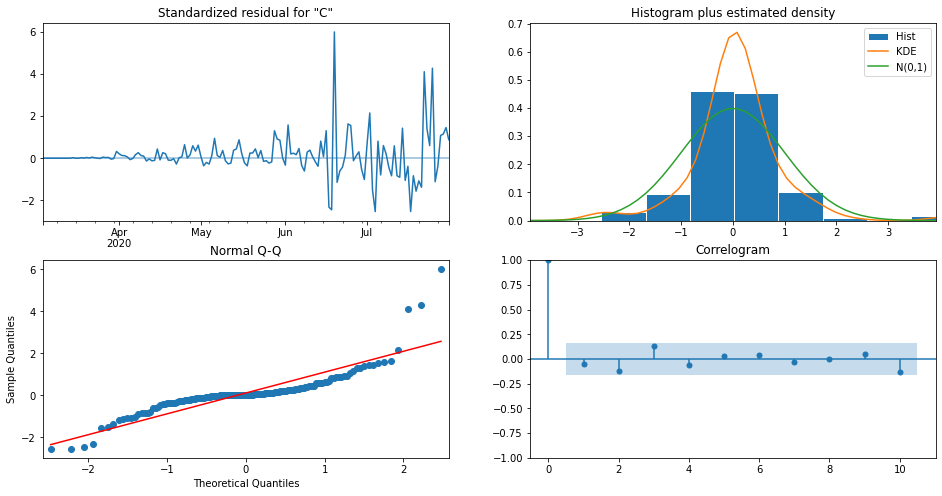

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

Nas últimas aulas aprendemos como definir os parâmetros para o modelo ARIMA sazonal. Mas não aprendemos a prever ainda o futuro e saber de fato o que vai acontecer. É isso que vamos fazer agora. Para isso vou criar uma variável chamada pred, de previsão. Ela vai estar relacionadas ao results, onde salvei meus resultados do fit do modelo ARIMA. E aí vou usar a função **get_prediction**, um dos parâmetros é o start, onde vai começar essa predição, então vou botar um do Pandas to_datetime para definirmos exatamente a data, e vou definir que quero que comece em 2020, pode ser primeiro de julho.

Nessa primeira etapa ainda vamos usar dados que temos no treinamento, pensa em um algoritmo supervisionado em que você tem teste e treinamento. Aqui vamos pegar uma parte para ser o treinamento e agora vamos testar essa nossa predição. Vou usar outro parâmetro de dynamic=False, e tem mais uma coisa. Como vamos definir se essa predição foi bem feita ou não? Vai ser só quando o erro for nulo? É querer demais do nosso modelo, até porque se nosso erro for nulo sempre talvez tenhamos um problema de overfit, então vou criar um intervalo de confiança, ou seja, qualquer resultado dentro desse intervalo vamos dizer que é aceitável. 

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2020-07-01,284123.520440,292788.232105
2020-07-02,293087.126884,301751.836120
2020-07-03,309712.379161,318377.086282
2020-07-04,313808.361404,322473.066683
2020-07-05,314049.627222,322714.330899
2020-07-06,320494.554350,329159.256632
2020-07-07,327045.630848,335710.332967
2020-07-08,336585.395767,345250.096660
2020-07-09,346345.227277,355009.926968
2020-07-10,356625.315779,365290.014425


Vou chamar esse intervalo de confiança de pred_ic, e ele vai ser dentro dessa predição, então chamo a mesma variável pred, vou usar a função conf_int, de intervalo de confiança. Vamos dar uma olhada em como ela aparece se eu rodar. Vou ter a parte inferior e a parte superior. É só plotar em conjunto. O que vou precisar fazer agora? Posso começar a plotar. Vou fazer o seguinte. Vou dizer que meu ax vão ser os dados de y, que são os dados dos casos de São Paulo, de 2020, e vou mandar ele plotar e vou botar um label observado, que são os dados observados.

Também vou calcular a média. Nós queremos a média móvel dessa predição, então vou botar pred.predicted_mean.plot, eu vou plotar no mesmo eixo, então ax=ax, label vai ser previsão, vou plotar de vermelho. Então color=‘r’, vou colocar certa transparência de 0.7. E vou definir o tamanho da figura como 14 e 7. Também vou mandar ele preencher entre os meus intervalos de confiança de cinza para ficar um pouco mais fácil de visualizar. Então vou usar a função fill_between e vou ter primeiro um x que vai ser pred_ic.index, que é onde tem a data, e vou ter que preencher entre duas linhas, que vão ser a lower, a parte de baixo, e a upper, a parte de cima. 

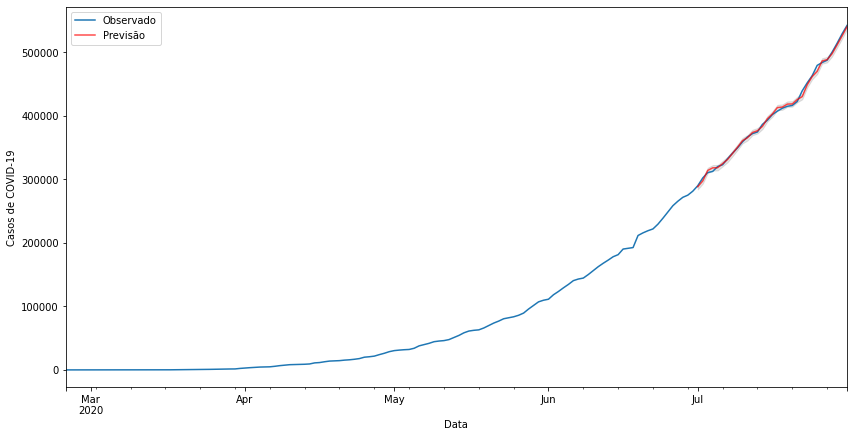

In [ ]:
ax = y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()



Agora vamos fazer exatamente a mesma coisa, mas para dados que não temos, então vou criar uma nova variável chamada pred_uc = results.get_forecast e aí vou colocar quantos steps eu quero, ou seja, quantos dias vou querer prever. Vou colocar 150 dias, só para darmos uma olhada inicialmente. Temos o **get_forecast**, vamos pegar para 150 dias. Temos o intervalo de confiança, plotamos o y, plotamos nossa previsão, preenchemos nosso intervalo de confiança e deixamos nosso gráfico bonito. Vamos vir em run. O que podemos ver?

Temos o intervalo de confiança que é bem maior, porque eu supostamente não tenho acesso a esses dados, então é normal que meu erro também acabe sendo maior. O que podemos fazer para de fato ter certeza de que isso é uma boa previsão? Na realidade, temos alguns dados extras.

Mais informações: https://eaulas.usp.br/portal/video.action?idItem=14378

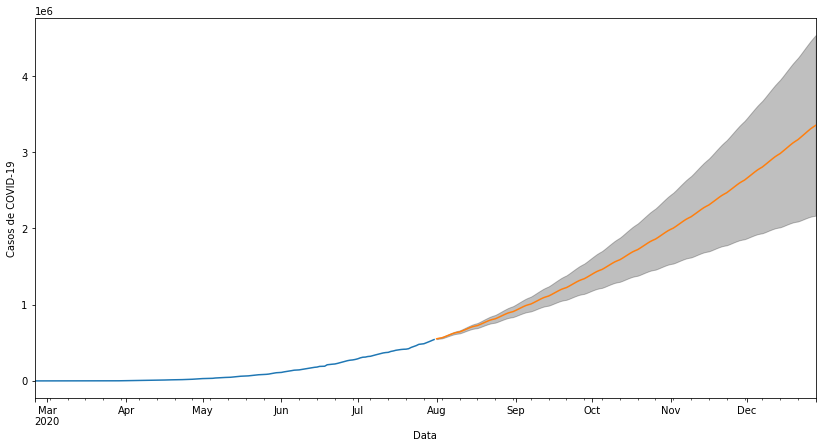

In [ ]:
pred_uc = results.get_forecast(steps=150)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0],pred_ic.iloc[:,1],color='k',alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()